In [1]:
using DataFrames
using Gadfly
using Compose
set_default_plot_size(30cm, 12cm)

In [2]:
function meta_var(s::AbstractString,v::Any)
         s=Symbol(s) 
         @eval (($s) = ($v))
end

meta_var (generic function with 1 method)

In [7]:
# Get ready
home = "/home/german/labo/17/pdz/"
corta_dist_dir = "run/lb/neq/distancias/corta/"
larga_dist_dir = "run/lb/neq/distancias/larga/"

"run/lb/neq/distancias/larga/"

In [21]:
###
# Corta
###
d0_mat = Array{Float64, 2}(2000, 400)
d1_mat = Array{Float64, 2}(2000, 400)
d2_mat = Array{Float64, 2}(2000, 400)

for j = 1:400
    # Read distances
    d0_mat[:, j] = readdlm(string(home, corta_dist_dir, j, "corta_dist_d0"))[:, 2]
    d1_mat[:, j] = readdlm(string(home, corta_dist_dir, j, "corta_dist_d1"))[:, 2]
    d2_mat[:, j] = readdlm(string(home, corta_dist_dir, j, "corta_dist_d2"))[:, 2]
end
            
# Get the averages
d0_corta = reshape(mapslices(x -> mean(x), d0_mat, 2), size(d0_mat)[1]);
d1_corta = reshape(mapslices(x -> mean(x), d1_mat, 2), size(d1_mat)[1]);
d2_corta = reshape(mapslices(x -> mean(x), d2_mat, 2), size(d2_mat)[1]);

# Compile into DataFrames
df_D_corta = DataFrame(Distance = [ d0_corta ; d1_corta ; d2_corta ],
    Time = repeat(collect(0.0005:0.0005:1), outer = [3]),
    Atoms = repeat([ "2076_479" ; "2076_460" ; "2016_543" ], inner = [ length(d0_corta) ]));

###
# Larga
###
d0_mat = Array{Float64, 2}(180, 400)
d1_mat = Array{Float64, 2}(180, 400)
d2_mat = Array{Float64, 2}(180, 400)

for j = 1:400
    # Read distances
    d0_mat[:, j] = readdlm(string(home, larga_dist_dir, j, "larga_dist_d0"))[:, 2]
    d1_mat[:, j] = readdlm(string(home, larga_dist_dir, j, "larga_dist_d1"))[:, 2]
    d2_mat[:, j] = readdlm(string(home, larga_dist_dir, j, "larga_dist_d2"))[:, 2]
end
            
# Get the averages
d0_larga = reshape(mapslices(x -> mean(x), d0_mat, 2), size(d0_mat)[1]);
d1_larga = reshape(mapslices(x -> mean(x), d1_mat, 2), size(d1_mat)[1]);
d2_larga = reshape(mapslices(x -> mean(x), d2_mat, 2), size(d2_mat)[1]);

# Compile into DataFrames
df_D_larga = DataFrame(Distance = [ d0_larga ; d1_larga ; d2_larga ],
    Time = repeat(collect(1.05:0.05:10), outer = [3]),
    Atoms = repeat([ "2076_479" ; "2076_460" ; "2016_543" ], inner = [ length(d0_larga) ]));

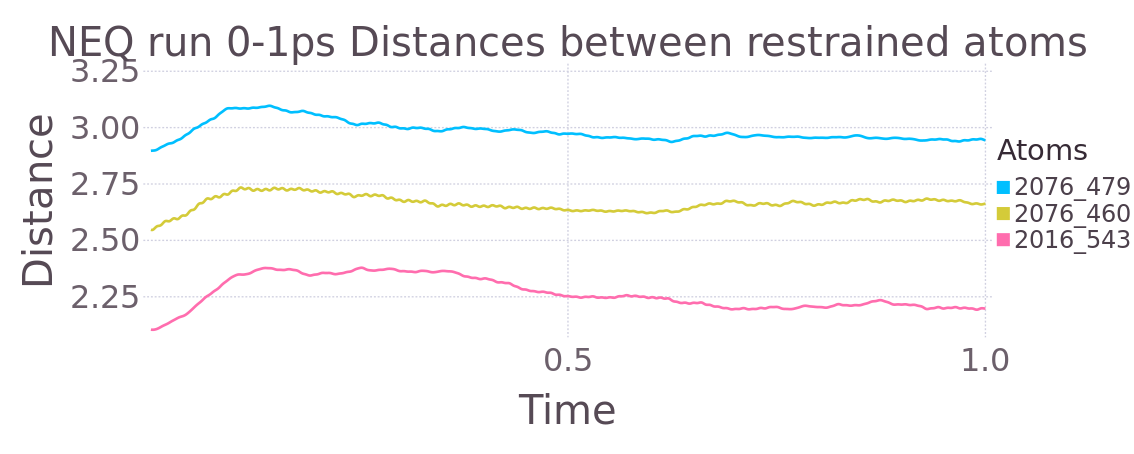

In [25]:
pdf_D_corta = plot(df_D_corta, Geom.line, x="Time", y="Distance", color = "Atoms",
Guide.title("NEQ run 0-1ps Distances between restrained atoms"),
Coord.cartesian(xmax = 1),
Guide.yticks(ticks = collect(2.25:0.25:3.25)),
Theme(line_width = 2pt, grid_line_width = 1pt,
minor_label_font_size = 24pt, major_label_font_size = 30pt, key_label_font_size = 18pt,
key_title_font_size = 22pt))                                                      

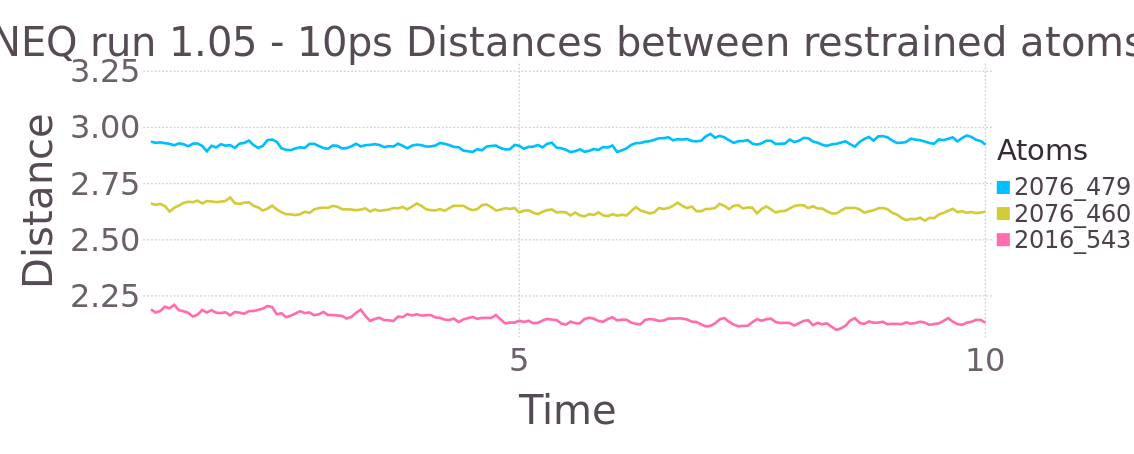

In [27]:
pdf_D_larga = plot(df_D_larga, Geom.line, x="Time", y="Distance", color = "Atoms",
Guide.title("NEQ run 1.05 - 10ps Distances between restrained atoms"),
Coord.cartesian(xmax = 10),
Guide.yticks(ticks = collect(2.25:0.25:3.25)),
Theme(line_width = 2pt, grid_line_width = 1pt,
minor_label_font_size = 24pt, major_label_font_size = 30pt, key_label_font_size = 18pt,
key_title_font_size = 22pt))                                                      